## Theano 기본 사용법
- 심볼 변수 정의
- 심볼 관계 정의
- 심볼 함수 정의
- 심볼 함수 사용

In [1]:
# MKL 라이브러리가 설치되어 있으면 다음 코드를 우선 실행한다.
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

In [10]:
import theano
import theano.tensor as T

In [15]:
x1 = T.dscalar('x1')
y1 = T.dscalar('y1')
# double scalar : dscalar

In [16]:
type(x1),type(y1)

(theano.tensor.var.TensorVariable, theano.tensor.var.TensorVariable)

In [17]:
x2 = T.dvector('x2')
y2 = T.dvector('y2')

In [18]:
x3 = T.dmatrix('x3')
y3 = T.dmatrix('y3')

In [20]:
z1 = x1 + y1

In [21]:
type(z1)

theano.tensor.var.TensorVariable

In [22]:
u1 = T.exp(z1)

In [23]:
type(u1)

theano.tensor.var.TensorVariable

In [24]:
z2 = T.dot(x2, y2)
type(z2)

theano.tensor.var.TensorVariable

In [25]:
z3 = T.sum(x3) + T.mean(y3)
type(z3)

theano.tensor.var.TensorVariable

In [26]:
theano.printing.pprint(x1)

'x1'

In [27]:
theano.printing.pprint(u1)

'exp((x1 + y1))'

In [29]:
from IPython.display import SVG

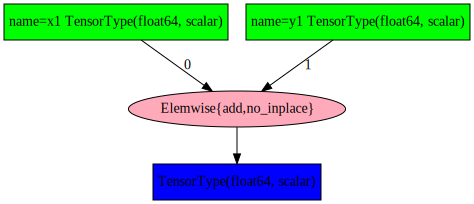

In [30]:
SVG(theano.printing.pydotprint(z1, return_image=True, format='svg'))

In [31]:
%time f1 = theano.function(inputs=[x1, y1], outputs=z1)

CPU times: user 17.4 ms, sys: 7.83 ms, total: 25.3 ms
Wall time: 432 ms


In [32]:
f1(1, 2)

array(3.)

In [33]:
f2 = theano.function([x2, y2], z2)
f2([1, 2], [3, 4])

array(11.)

In [34]:
f3 = theano.function([x3, y3], z3)
f3([[1], [2]], [[3], [4]])

array(6.5)

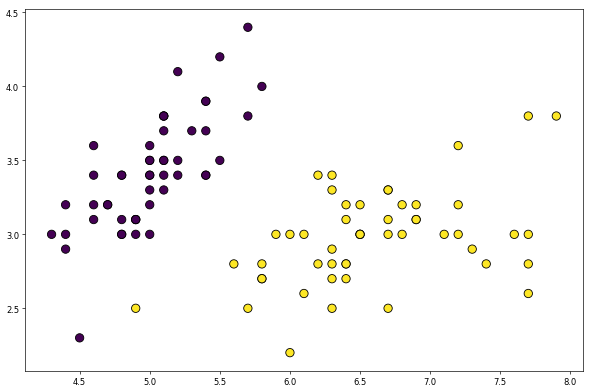

In [308]:
from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0, 2])
X_data = iris.data[idx, 0:2]
y_data = iris.target[idx] / 2

plt.figure(figsize=(12, 8), dpi=60)
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=100, edgecolor='k')
plt.show()

In [309]:
X = T.dmatrix('X')
y = T.dvector('y')
np.random.seed(0)
w = theano.shared(0.01 * np.random.randn(2), name="w")
b = theano.shared(0.01 * np.random.randn(1)[0], name="b")
d = 1 / (1 + T.exp(-(T.dot(X, w) + b)))
cost = T.sum((y - d)**2)

In [310]:
gw, gb = T.grad(cost, [w, b])
mu = 0.02
train = theano.function([X, y], cost, updates=[(w, w - mu * gw), (b, b - mu * gb)])

In [311]:
for i in range(1000000):
    cost_i = train(X_data, y_data)
    if i % 5000 == 0:
        print("{:4d}: ".format(i), cost_i)

   0:  24.77347311486501
5000:  0.45317122306045554
10000:  0.3241803908257833
15000:  0.27527414407827694
20000:  0.24644462083161872
25000:  0.22578632464299425
30000:  0.20943628630982544
35000:  0.19574994280399383
40000:  0.1839012314674033
45000:  0.17342418805657386
50000:  0.164030857756478
55000:  0.15552910067339065
60000:  0.14778205011655646
65000:  0.1406867622047945
70000:  0.13416235991020245
75000:  0.12814312910582956
80000:  0.12257430887114672
85000:  0.11740940314354592
90000:  0.1126083826343458
95000:  0.10813642702660105
100000:  0.10396300775876327
105000:  0.10006119413583017
110000:  0.09640711180991211
115000:  0.09297950929337245
120000:  0.08975940384498139
125000:  0.08672978754756357
130000:  0.0838753802795022
135000:  0.08118242004987412
140000:  0.07863848365201244
145000:  0.0762323322801927
150000:  0.07395377794408993
155000:  0.07179356737309964
160000:  0.06974328074157965
165000:  0.06779524303157247
170000:  0.06594244622783407
175000:  0.064178

In [312]:
y_pred = T.round(d)
y_pred_func = theano.function([X], y_pred)
y_pred = y_pred_func(X_data)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [313]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_data, y_pred)

array([[50,  0],
       [ 0, 50]])

In [314]:
accuracy_score(y_data,y_pred)

1.0